In [3]:
!pip install --user sklearn

Looking in indexes: https://pypi.python.org/simple
     |████████████████████████████████| 10.9MB 2.3MB/s eta 0:00:01
     |████████████████████████████████| 296kB 26.8MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=7b93bb175b26e1750344e091607a48b08116f99efb57b7733b55fb935f7f59b4
  Stored in directory: /Users/mayanktiwari/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [4]:
from bson.json_util import loads
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style(style="white")

In [5]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm.classes import OneClassSVM
from sklearn.neural_network.multilayer_perceptron import MLPClassifier
from sklearn.neighbors.classification import RadiusNeighborsClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier    
from sklearn.gaussian_process.gpc import GaussianProcessClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB  
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture

/Users/mayanktiwari/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/mayanktiwari/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neural_network. Anything that cannot be imported from sklearn.neural_network is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/mayanktiwari/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.classificat

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Location: drive/Shared\ drives/Chess\ ELO\ Drive/data_121269_records.json
# with open('/content/drive/Shared drives/Chess ELO Drive/mongo_data_dump_12_05_2019_02_28_23.json', 'r') as f:
with open('/Users/mayanktiwari/Developer/Workspaces/KaggleWorkspace/ChessELOPrediction/ELO/dump/mongo_data_dump_12_05_2019_02_28_23.json', 'r') as f:
    all_data = loads(f.read())

In [6]:
df = pd.DataFrame(all_data)

In [7]:
def score_early_mid_end_game(val):
  total_moves = len(val)
  white_early = 0
  black_early = 0
  white_mid = 0
  black_mid = 0
  white_end = 0
  black_end = 0
  early_moves = total_moves/4
  end_moves = total_moves/4
  mid_moves = total_moves/2
  for i in range(1, total_moves):
    move = val[i]
    #Can Fetch other things
    if i <= early_moves:
      if not move['turn']:
        #Means black turn
        black_early += move['score']
      else:
        white_early += move['score']
    elif i > early_moves and i < early_moves+mid_moves:
      if not move['turn']:
        #Means black tunr
        black_mid += move['score']
      else:
        white_mid += move['score']
    else:
      if not move['turn']:
        #Means black tunr
        black_end += move['score']
      else:
        white_end += move['score']
  return white_early, black_early, white_mid, black_mid, white_end, black_end

In [8]:
def calculate_advantages(val):
  total_moves = len(val)
  white_advantage = 0
  black_advantage = 0
  for i in range(1, total_moves):
    move = val[i]
    #Can Fetch other things
    if move['turn']:
      #black advantage
      black_advantage += (move['score'])
    else:
      white_advantage += (move['score'])
    
    white_advantage = white_advantage/ total_moves
    black_advantage = black_advantage/ total_moves
  return white_advantage, black_advantage

In [9]:
def clean_event_column(event_parsed):
  event_parsed = event_parsed.apply(lambda x: re.sub('Rated Blitz.+', 'Rated Blitz game', x))
  event_parsed = event_parsed.apply(lambda x: re.sub('Rated Bullet.+', 'Rated Bullet game', x))
  event_parsed = event_parsed.apply(lambda x: re.sub('Rated Rapid.+', 'Rated Rapid game', x))
  event_parsed = event_parsed.apply(lambda x: re.sub('Rated UltraBullet.+', 'Rated UltraBullet game', x))
  event_parsed = event_parsed.apply(lambda x: re.sub('Rated Classical.+', 'Rated Classical game', x))

  return event_parsed

In [10]:
def total_average_score(x):
  total_moves = len(x)
  if total_moves == 0:
    return 0
  score = 0
  for i in range(1, total_moves):
    move = x[i]
    score+=abs(move['score'])
  score = score/total_moves
  return score

In [11]:
def game_stats(val):
  a,b,c,d,e,f = score_early_mid_end_game(val["moves"])
  x,y = calculate_advantages(val["moves"])
  avg = total_average_score(val["moves"])
  return pd.Series({"WhiteEarly": a, "WhiteMid": b, "WhiteEnd": c, "BlackEarly": d, "BlackMid": e, "BlackEnd": f, "WhiteAverage": x, "BlackAverage": y, "AbsoluteAverage": avg})

In [12]:
# len(df)
def clean_dataset(df):
  df = df[df["termination"] != "Abandoned"]
  series = df.apply(lambda x: game_stats(x), axis=1)
  df = df.join(series)
  dataframe = df.drop(['moves', 'metadata'], axis=1)
  dataframe["event"] = clean_event_column(dataframe["event"])
  dataframe = dataframe[(dataframe["event"] == "Rated Classical game") | (dataframe["event"] == "Rated Rapid game") | (dataframe["event"] == "Rated Bullet game")]
  dataframe.drop(['white', 'black'], axis=1, inplace=True)
  results = dataframe['result'].apply(lambda x: parse_result(x))
  dataframe = dataframe.join(results)
  dataframe.drop(['site', 'result', 'uTCDate', 'uTCTime', '_id'], axis=1, inplace=True)
  return dataframe

In [13]:
def parse_result(val):
  white=0
  black=0
  if val == '1-0':
    white = 1
  elif val == '0-1':
    black=1
  return pd.Series({'white': white, 'black': black})

In [14]:
# df.termination.value_counts()
dataframe = clean_dataset(df)

In [15]:
dataframe.describe()

,end_B,end_K,end_P,end_Q,end_R,end_b,end_k,end_n,end_p,end_q,...,WhiteMid,WhiteEnd,BlackEarly,BlackMid,BlackEnd,WhiteAverage,BlackAverage,AbsoluteAverage,white,black
count,31441.000000,65487.0,61977.000000,32670.000000,47634.000000,32838.000000,65487.0,25303.000000,61967.000000,31976.000000,...,65491.000000,65491.000000,65491.000000,65491.000000,65491.000000,65491.000000,65491.000000,65491.000000,65491.000000,65491.000000
mean,1.269998,1.0,4.609775,1.024671,1.524877,1.274712,1.0,1.250721,4.595220,1.023080,...,640.160587,578.964499,1261.112764,100.353972,306.423249,-2.746401,-3.446323,391.443891,0.500542,0.467606
std,0.443965,0.0,1.748736,0.165436,0.499428,0.446376,0.0,0.433984,1.737399,0.158074,...,1254.021756,10506.911510,10512.262587,9097.405784,9139.495062,17.390902,18.216853,268.183718,0.500004,0.498953
min,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,-22981.000000,-105458.000000,-115173.000000,-93304.000000,-85339.000000,-323.343750,-262.864000,0.000000,0.000000,0.000000
25%,1.000000,1.0,3.000000,1.000000,1.000000,1.000000,1.0,1.000000,3.000000,1.000000,...,216.000000,-2474.000000,-1821.000000,-3313.000000,-3023.500000,-0.071450,-0.096512,190.339514,0.000000,0.000000
50%,1.000000,1.0,5.000000,1.000000,2.000000,1.000000,1.0,1.000000,5.000000,1.000000,...,506.000000,262.000000,844.000000,21.000000,99.000000,0.000166,0.000050,327.236486,1.000000,0.000000
75%,2.000000,1.0,6.000000,1.000000,2.000000,2.000000,1.0,2.000000,6.000000,1.000000,...,931.000000,3722.500000,4421.500000,3585.000000,3757.000000,0.096215,0.063833,524.709756,1.000000,1.000000
max,2.000000,1.0,8.000000,6.000000,3.000000,2.000000,1.0,5.000000,8.000000,5.000000,...,19451.000000,103309.000000,107796.000000,85920.000000,101145.000000,337.937500,194.909264,2445.729730,1.000000,1.000000


In [236]:
dummies = pd.get_dummies(dataframe['event'])
dataframe = dataframe.join(dummies)
dataframe.drop('event', axis = 1, inplace=True)

In [0]:
# dummies = pd.get_dummies(dataframe['timeControl'])
# dataframe = dataframe.join(dummies)
dataframe.drop('timeControl', axis = 1, inplace=True)

In [0]:
dummies = pd.get_dummies(dataframe['termination'])
dataframe = dataframe.join(dummies)
dataframe.drop('termination', axis = 1, inplace=True)

In [0]:
# dummies = pd.get_dummies(dataframe['opening'])
# dataframe = dataframe.join(dummies)
dataframe.drop('opening', axis = 1, inplace=True)

In [0]:
dataframe

Index(['whiteElo', 'blackElo', 'whiteRatingDiff', 'blackRatingDiff', 'eCO',
       'end_B', 'end_K', 'end_P', 'end_Q', 'end_R', 'end_b', 'end_k', 'end_n',
       'end_p', 'end_q', 'end_r', 'first_check_at', 'is_checkmate',
       'total_checks', 'total_moves', 'end_N', 'promotion', 'is_stalemate',
       'insufficient_material', 'can_claim_draw', 'black_king_castle',
       'white_queen_castle', 'white_king_castle', 'black_queen_castle',
       'WhiteEarly', 'WhiteMid', 'WhiteEnd', 'BlackEarly', 'BlackMid',
       'BlackEnd', 'WhiteAverage', 'BlackAverage', 'white', 'black',
       'Rated Bullet game', 'Rated Classical game', 'Rated Rapid game',
       'Abandoned', 'Normal', 'Rules infraction', 'Time forfeit'],
      dtype='object')

In [0]:
dataframe["whiteElo"] = dataframe["whiteElo"].astype(int)
dataframe["blackElo"] = dataframe["blackElo"].astype(int)
dataframe['averageElo'] = dataframe[["whiteElo", "blackElo"]].mean(axis=1)

In [0]:
board_metrics = dataframe[["WhiteEarly", "WhiteMid", "WhiteEnd", "BlackEarly", "BlackMid","BlackEnd", "WhiteAverage", "BlackAverage"]]


In [0]:
# board_metrics.plot()
dataframe["averageElo"]

In [0]:
dasss = dataframe.drop(["whiteElo", "blackElo"], axis=1)

In [302]:
# X = dasss.drop(['eCO', 'averageElo'], axis=1).fillna(0)
y = dataframe['averageElo']

In [0]:
dataframe["WhiteAverage"] = dataframe["WhiteAverage"].astype(int)
dataframe["BlackAverage"] = dataframe["BlackAverage"].astype(int)
dataframe['averageScore'] = dataframe[["WhiteAverage", "BlackAverage"]].mean(axis=1)

In [0]:
X.columns

Index(['whiteRatingDiff', 'blackRatingDiff', 'timeControl', 'end_B', 'end_K',
       'end_P', 'end_Q', 'end_R', 'end_b', 'end_k', 'end_n', 'end_p', 'end_q',
       'end_r', 'first_check_at', 'is_checkmate', 'total_checks',
       'total_moves', 'end_N', 'promotion', 'is_stalemate',
       'insufficient_material', 'can_claim_draw', 'black_king_castle',
       'white_queen_castle', 'white_king_castle', 'black_queen_castle',
       'WhiteEarly', 'WhiteMid', 'WhiteEnd', 'BlackEarly', 'BlackMid',
       'BlackEnd', 'WhiteAverage', 'BlackAverage', 'white', 'black',
       'Rated Bullet game', 'Rated Classical game', 'Rated Rapid game',
       'Abandoned', 'Normal', 'Rules infraction', 'Time forfeit',
       'averageScore'],
      dtype='object')

In [0]:
lin_reg = LinearRegression()
cv_results_lin_reg = cross_validate(lin_reg, X, y, cv=3)
cv_results_lin_reg

{'fit_time': array([0.27328229, 0.21052718, 0.21263123]),
 'score_time': array([0.08403635, 0.07818937, 0.083318  ]),
 'test_score': array([0.19454723, 0.19432762, 0.19473298])}

In [0]:
rf_reg = RandomForestRegressor()
cv_results_rf_reg = cross_validate(rf_reg, X, y, cv=3)
cv_results_rf_reg

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'fit_time': array([7.48028922, 7.4968276 , 7.47069216]),
 'score_time': array([0.1579864 , 0.1559577 , 0.16783309]),
 'test_score': array([0.17787777, 0.16745251, 0.17468024])}

In [0]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
cvr = cross_validate(reg, X, y, cv=3)
cvr

{'fit_time': array([0.19243789, 0.19054222, 0.19071484]),
 'score_time': array([0.13259602, 0.07754374, 0.07663298]),
 'test_score': array([0.19453057, 0.19429812, 0.19480198])}

In [0]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor()
cvrgr = cross_validate(regr, X, y, cv=3)
cvrgr

{'fit_time': array([31.85534072, 32.09496236, 25.18177104]),
 'score_time': array([0.17881274, 0.18465185, 0.17867565]),
 'test_score': array([0.12411254, 0.11546762, 0.12051968])}

In [241]:
X = dataframe.drop(["whiteElo", "blackElo", "averageElo", "eCO", "timeControl", "termination", "ranking"], axis=1).fillna(0)

In [303]:
min_thresh = y.mean()-1*y.std()
max_thresh = y.mean()+1*y.std()
conditions = [
    (dataframe['averageElo'] < min_thresh),
    (dataframe['averageElo'] > min_thresh) & (dataframe['averageElo'] < max_thresh),
    (dataframe['averageElo'] > max_thresh)]
choices = ['1', '2', '3']
ranking = np.select(conditions, choices, default='1')
dataframe["ranking"] = ranking

In [304]:
y_ranking = dataframe['ranking'].astype(int)

In [22]:
delta = dataframe[dataframe["ranking"].astype(int) != 2]

In [210]:
X = dataframe[["AbsoluteAverage", "total_moves"]].fillna(0)
y_ranking.describe()

count    65491.000000
mean         1.991419
std          0.581398
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: ranking, dtype: float64

In [267]:
X.dtypes

whiteRatingDiff           object
blackRatingDiff           object
opening                   object
end_B                    float64
end_K                    float64
end_P                    float64
end_Q                    float64
end_R                    float64
end_b                    float64
end_k                    float64
end_n                    float64
end_p                    float64
end_q                    float64
end_r                    float64
first_check_at           float64
is_checkmate             float64
total_checks             float64
total_moves              float64
end_N                    float64
promotion                float64
is_stalemate             float64
insufficient_material    float64
can_claim_draw           float64
black_king_castle        float64
white_queen_castle       float64
white_king_castle        float64
black_queen_castle       float64
WhiteEarly               float64
WhiteMid                 float64
WhiteEnd                 float64
BlackEarly

In [0]:
dt_clf = DecisionTreeClassifier()
cv_results_dt_clf = cross_validate(dt_clf, X, y_ranking, cv=3)
cv_results_dt_clf

{'fit_time': array([1.55176902, 1.50467587, 1.49066043]),
 'score_time': array([0.10683298, 0.08382964, 0.07305574]),
 'test_score': array([0.54500481, 0.543539  , 0.5422603 ])}

In [271]:
xl = X.drop(["whiteRatingDiff", "blackRatingDiff", "opening"], axis=1)

In [305]:
ddd = xl.join(y_ranking)


2    43349
1    11352
3    10790
Name: ranking, dtype: int64

In [308]:
dt_rf = RandomForestClassifier(max_depth=6, random_state=0)
cv_results_dt_rf = cross_validate(dt_rf, xl, y_ranking, cv=3)
cv_results_dt_rf
dt_rf.fit(xl, y_ranking)
dt_rf.feature_importances_

NameError: name 'pyplot' is not defined

In [310]:
!pip install --user pyplot

Looking in indexes: https://pypi.python.org/simple
ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot


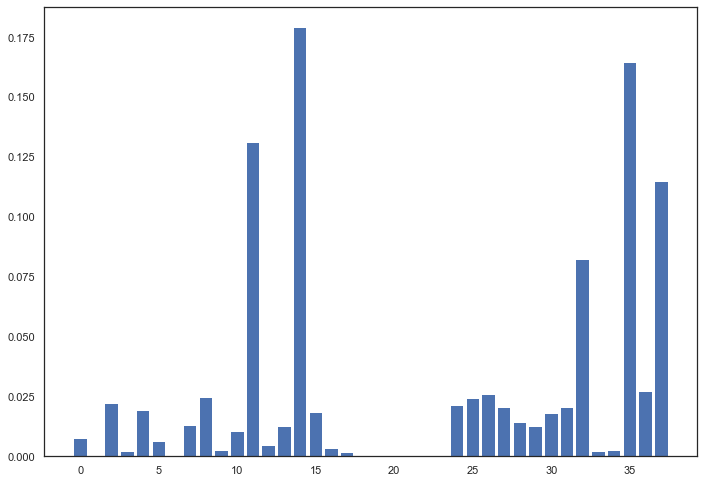

In [313]:
from matplotlib import pyplot
pyplot.bar(range(len(dt_rf.feature_importances_)), dt_rf.feature_importances_)
pyplot.show()

In [330]:
# len(dt_rf.feature_importances_)
# X.shape[1]
X.columns

Index(['whiteRatingDiff', 'blackRatingDiff', 'opening', 'end_B', 'end_K',
       'end_P', 'end_Q', 'end_R', 'end_b', 'end_k', 'end_n', 'end_p', 'end_q',
       'end_r', 'first_check_at', 'is_checkmate', 'total_checks',
       'total_moves', 'end_N', 'promotion', 'is_stalemate',
       'insufficient_material', 'can_claim_draw', 'black_king_castle',
       'white_queen_castle', 'white_king_castle', 'black_queen_castle',
       'WhiteEarly', 'WhiteMid', 'WhiteEnd', 'BlackEarly', 'BlackMid',
       'BlackEnd', 'WhiteAverage', 'BlackAverage', 'AbsoluteAverage', 'white',
       'black', 'Rated Bullet game', 'Rated Classical game',
       'Rated Rapid game'],
      dtype='object')

Feature ranking:


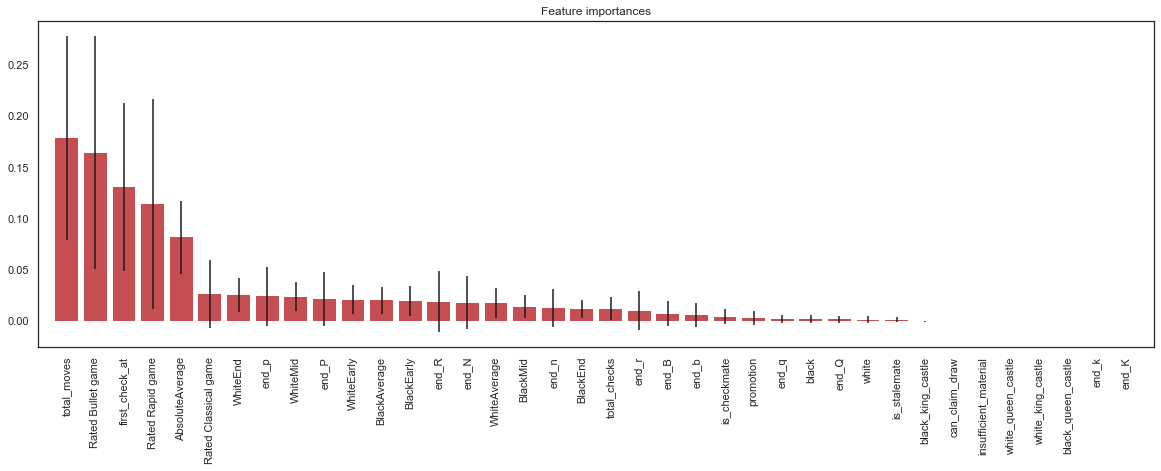

In [359]:
importances = dt_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in dt_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

# for f in range(X.shape[1]):
# ival = range(X.shape[1])
ival = range(38)
# for f in ival:
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
# plt.figure()
f, ax = plt.subplots(figsize=(20, 6))
plt.title("Feature importances")
plt.bar(ival, importances[indices], color="r", yerr=std[indices], align="center")

# plt.xticks(ival, indices)
plt.xticks(range(len(indices)), colOrder, rotation=90)

plt.xlim([-1, 38])
plt.show()

In [344]:
xl.columns

Index(['end_B', 'end_K', 'end_P', 'end_Q', 'end_R', 'end_b', 'end_k', 'end_n',
       'end_p', 'end_q', 'end_r', 'first_check_at', 'is_checkmate',
       'total_checks', 'total_moves', 'end_N', 'promotion', 'is_stalemate',
       'insufficient_material', 'can_claim_draw', 'black_king_castle',
       'white_queen_castle', 'white_king_castle', 'black_queen_castle',
       'WhiteEarly', 'WhiteMid', 'WhiteEnd', 'BlackEarly', 'BlackMid',
       'BlackEnd', 'WhiteAverage', 'BlackAverage', 'AbsoluteAverage', 'white',
       'black', 'Rated Bullet game', 'Rated Classical game',
       'Rated Rapid game'],
      dtype='object')

In [345]:
indices

array([14, 35, 11, 37, 32, 36, 26,  8, 25,  2, 24, 31, 27,  4, 15, 30, 28,
        7, 29, 13, 10,  0,  5, 12, 16,  9, 34,  3, 33, 17, 20, 19, 18, 21,
       22, 23,  6,  1])

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [346]:
cols = xl.columns
colOrder = []
for index in indices:
    colOrder.append(cols[index])
colOrder

['total_moves',
 'Rated Bullet game',
 'first_check_at',
 'Rated Rapid game',
 'AbsoluteAverage',
 'Rated Classical game',
 'WhiteEnd',
 'end_p',
 'WhiteMid',
 'end_P',
 'WhiteEarly',
 'BlackAverage',
 'BlackEarly',
 'end_R',
 'end_N',
 'WhiteAverage',
 'BlackMid',
 'end_n',
 'BlackEnd',
 'total_checks',
 'end_r',
 'end_B',
 'end_b',
 'is_checkmate',
 'promotion',
 'end_q',
 'black',
 'end_Q',
 'white',
 'is_stalemate',
 'black_king_castle',
 'can_claim_draw',
 'insufficient_material',
 'white_queen_castle',
 'white_king_castle',
 'black_queen_castle',
 'end_k',
 'end_K']

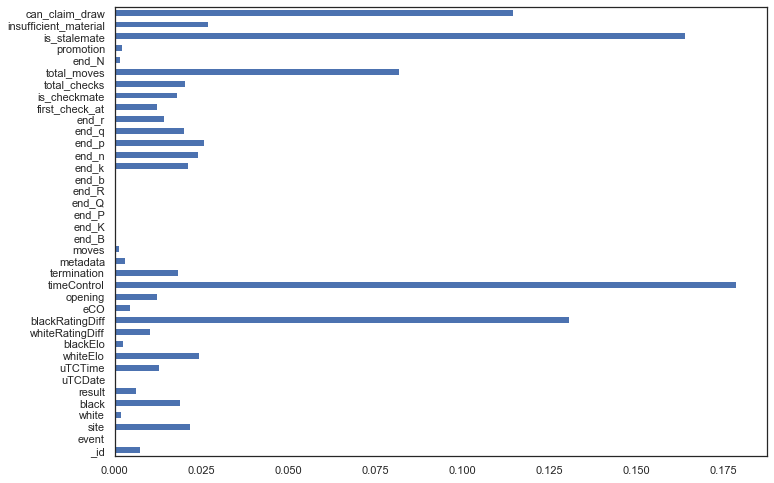

In [363]:
feat_importances = pd.Series(dt_rf.feature_importances_, index=df.columns[0:38])
feat_importances.plot(kind='barh');

In [376]:
fi = feat_importances.to_frame().reset_index()
fi = fi.rename(columns={0: "feature", 1: "importance"})
fi

,index,feature
0,_id,0.007294
1,event,0.000000
2,site,0.021706
3,white,0.001753
4,black,0.018841
5,result,0.006116
6,uTCDate,0.000000
7,uTCTime,0.012780
8,whiteElo,0.024178
9,blackElo,0.002331


In [382]:
fi = fi.sort_values('feature', ascending=False)
fi

,index,feature
14,timeControl,0.178716
35,is_stalemate,0.164074
11,blackRatingDiff,0.130688
37,can_claim_draw,0.114401
32,total_moves,0.081883
36,insufficient_material,0.026761
26,end_p,0.025682
8,whiteElo,0.024178
25,end_n,0.023876
2,site,0.021706


In [0]:
dt_knn = KNeighborsClassifier()
cv_results_dt_knn = cross_validate(dt_knn, X, y_ranking, cv=3)
cv_results_dt_knn


{'fit_time': array([0.3222549 , 0.28168893, 0.27337646]),
 'score_time': array([3.27530599, 3.13943672, 3.19390321]),
 'test_score': array([0.58966607, 0.59062801, 0.59191901])}

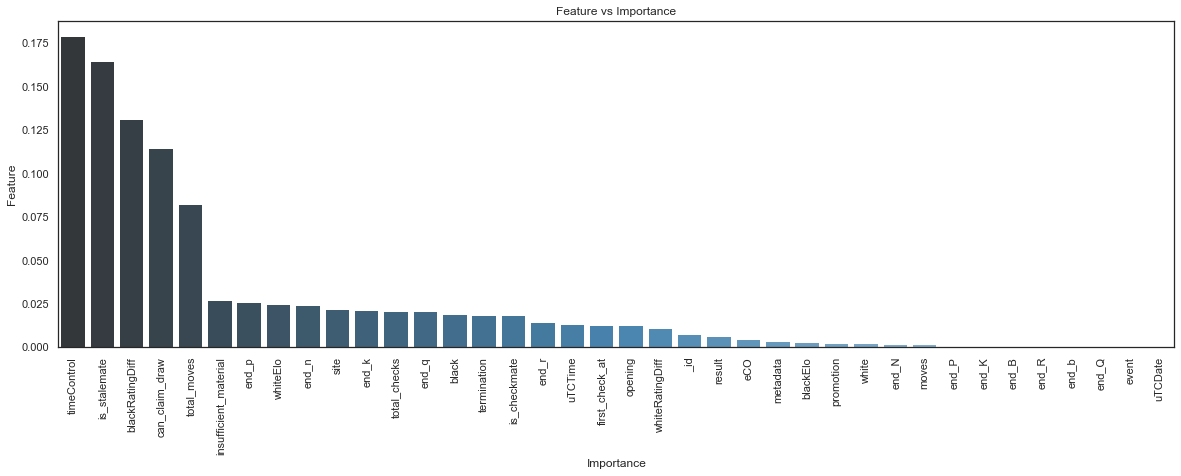

In [416]:
f, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x="index", y="feature", data=fi, palette=("Blues_d"));
plt.xlabel("Importance")
plt.xticks(rotation=90)
plt.ylabel("Feature")
plt.title("Feature vs Importance");

In [0]:
clf_lre = BernoulliNB()
cv_results_clf_lre = cross_validate(clf_lre, X, y_ranking, cv=3)
cv_results_clf_lre


{'fit_time': array([0.29019976, 0.29818392, 0.27273059]),
 'score_time': array([0.13040137, 0.11103773, 0.11507559]),
 'test_score': array([0.6255325 , 0.6348312 , 0.62013835])}

In [260]:
boost = GradientBoostingClassifier()
# cv_results_boost = cross_validate(boost, X, y_ranking, cv=3)
# cv_results_boost
# y = y_ranking[:,8]
# boost.fit(X, y_ranking)

TypeError: '(slice(None, None, None), slice(0, 8, None))' is an invalid key

In [256]:
# from xgboost import XGBClassifier
# !pip install --user xgboost
xg_boost = XGBClassifier()
xg_results_boost = cross_validate(xg_boost, X, y_ranking, cv=3)
xg_results_boost

/Users/mayanktiwari/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields whiteRatingDiff, blackRatingDiff, opening

  FitFailedWarning)


{'fit_time': array([0.03641677, 0.01753688, 0.01959205]),
 'score_time': array([0., 0., 0.]),
 'test_score': array([nan, nan, nan])}

In [257]:
# fig, ax = plt.subplots(figsize=(30, 30))
# plot_tree(xg_results_boost, num_trees=4, ax=ax)
# plt.show()
# feature importance
print(boost.feature_importances_)
# plot
# pyplot.bar(range(len(xg_boost.feature_importances_)), xg_boost.feature_importances_)
# pyplot.show()

NotFittedError: This GradientBoostingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [230]:
# !pip install --user shap
import shap
# load JS visualization code to notebook
shap.initjs()

In [244]:
import xgboost

# train XGBoost model
# X_l,y_l = shap.datasets.boston()
# model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y_÷), 100)
X_test = X.drop(["whiteRatingDiff", "blackRatingDiff", "opening"], axis=1)
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_test, label=y_ranking), 100)
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

Could not find feature named: RM


AssertionError: 'shap_values' and 'features' values must have the same number of rows!

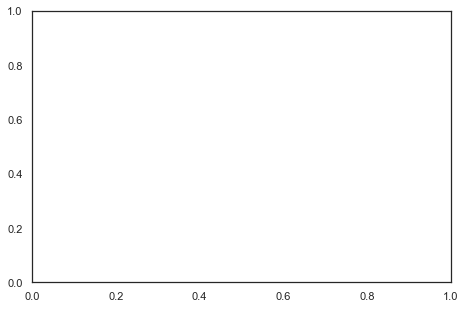

In [232]:
shap.dependence_plot("total_moves", shap_values, X);

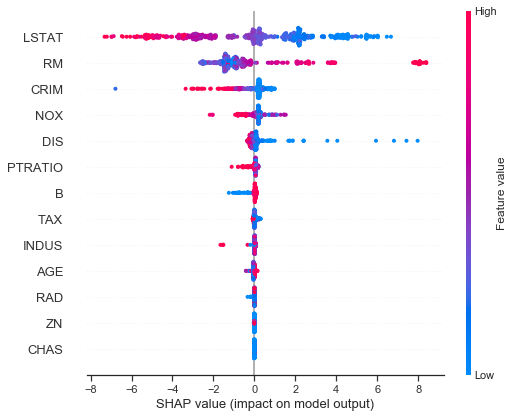

In [234]:
shap.summary_plot(shap_values, X_l)

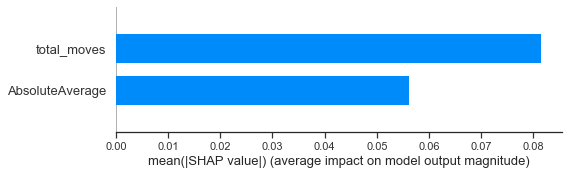

In [225]:
shap.summary_plot(shap_values, X, plot_type="bar")

ImportError: You must install graphviz to plot tree

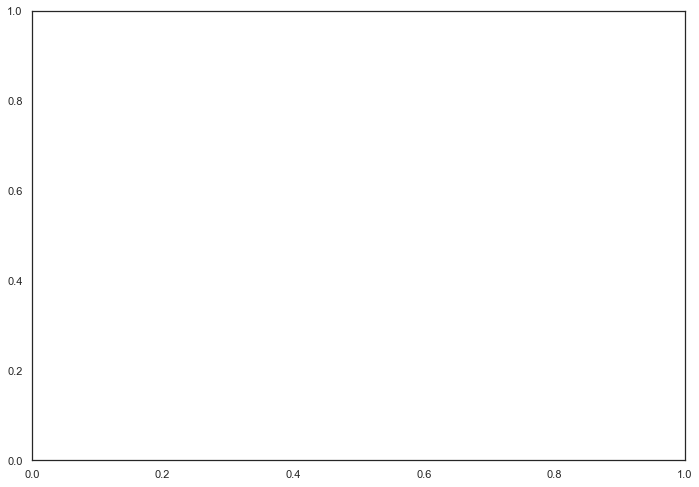

In [245]:
# from numpy import loadtxt
# from xgboost import XGBClassifier
# from xgboost import plot_tree

# plot_tree(boost)
# plt.show()
# explainer = shap.TreeExplainer(xg_results_boost)
# !brew reinstall graphviz
# !pip install --user python-graphviz
# !pip install --user pydot

from xgboost import plot_tree
plot_tree(xg_results_boost)

# Part 2

In [24]:
df_2 = pd.DataFrame(all_data)

In [25]:
dataframe = clean_dataset(df_2)

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = pd.Series(le.fit_transform(dataframe["event"]))

In [0]:
X = dataframe.drop(["event", "whiteElo", "blackElo", "whiteRatingDiff", "blackRatingDiff", "eCO", "opening", "timeControl", "termination"], axis=1)

In [26]:
# import seaborn as sns; sns.set()
X["event"] = y

In [28]:
dataframe["whiteElo"] = dataframe["whiteElo"].astype(int)
dataframe["blackElo"] = dataframe["blackElo"].astype(int)
dataframe['averageElo'] = dataframe[["whiteElo", "blackElo"]].mean(axis=1)
y = dataframe['averageElo']
min_thresh = y.mean()-1*y.std()
max_thresh = y.mean()+1*y.std()
conditions = [
    (dataframe['averageElo'] < min_thresh),
    (dataframe['averageElo'] > min_thresh) & (dataframe['averageElo'] < max_thresh),
    (dataframe['averageElo'] > max_thresh)]
choices = ['1', '2', '3']
ranking = np.select(conditions, choices, default='1')
dataframe["ranking"] = ranking

In [30]:
dataframe["whiteElo"] = dataframe["whiteElo"].astype(int)
dataframe["promotion"] = dataframe["promotion"].astype(int)
# dataframe.groupby("ranking")["promotion"].plot()
dataframe.columns
# dataframe["promotion"].fillna(0, inplace=True)

Index(['event', 'whiteElo', 'blackElo', 'whiteRatingDiff', 'blackRatingDiff',
       'eCO', 'opening', 'timeControl', 'termination', 'end_B', 'end_K',
       'end_P', 'end_Q', 'end_R', 'end_b', 'end_k', 'end_n', 'end_p', 'end_q',
       'end_r', 'first_check_at', 'is_checkmate', 'total_checks',
       'total_moves', 'end_N', 'promotion', 'is_stalemate',
       'insufficient_material', 'can_claim_draw', 'black_king_castle',
       'white_queen_castle', 'white_king_castle', 'black_queen_castle',
       'WhiteEarly', 'WhiteMid', 'WhiteEnd', 'BlackEarly', 'BlackMid',
       'BlackEnd', 'WhiteAverage', 'BlackAverage', 'AbsoluteAverage', 'white',
       'black', 'averageElo', 'ranking'],
      dtype='object')

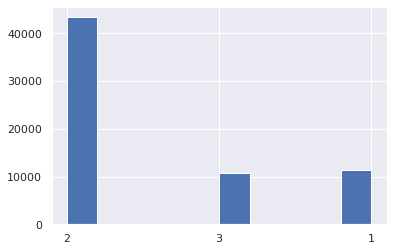

In [0]:
# dataframe['promotion'].hist(by=dataframe['Letter'])

In [34]:
sns.set()
sns.set_style(style="white")

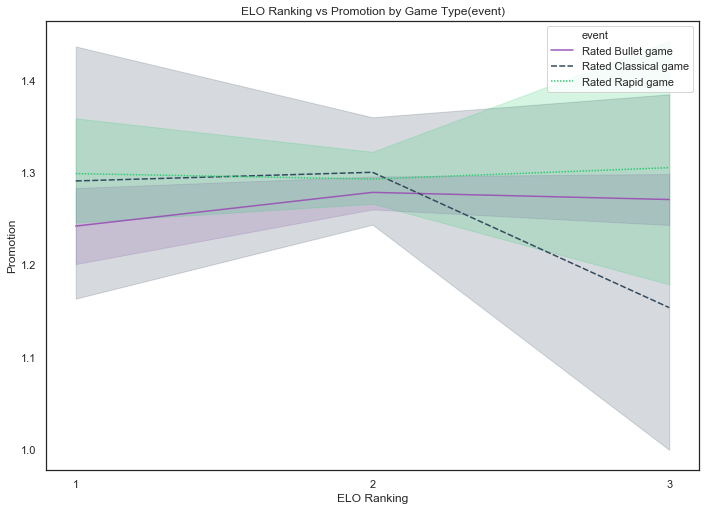

In [70]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplots(figsize=(11.7, 8.27))
sns.lineplot(
    x="ranking", y="promotion", style="event", hue="event", 
    data=dataframe, 
#     palette=sns.color_palette("Set2", 3)
    palette=sns.color_palette(["#9b59b6", "#34495e", "#2ecc71"])
);
plt.xlabel("ELO Ranking")
plt.ylabel("Promotion")
plt.title("ELO Ranking vs Promotion by Game Type(event)");

In [0]:
dt_rf = RandomForestClassifier(max_depth=6, random_state=0)
cv_results_dt_rf = cross_validate(dt_rf, X.fillna(0), y, cv=3)
cv_results_dt_rf

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'fit_time': array([0.48262024, 0.45371938, 0.45672917]),
 'score_time': array([0.02565122, 0.02402687, 0.02379966]),
 'test_score': array([0.71980212, 0.71800275, 0.71809437])}

In [0]:
dt_rf = LogisticRegression()
cv_results_dt_rf = cross_validate(dt_rf, X.fillna(0), y, cv=3)
cv_results_dt_rf

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

{'fit_time': array([6.38380384, 7.12505198, 6.27876401]),
 'score_time': array([0.06224585, 0.04761291, 0.04518723]),
 'test_score': array([0.72071824, 0.72116354, 0.72308749])}

In [0]:
dt_knn = KNeighborsClassifier()
cv_results_dt_knn = cross_validate(dt_knn, X.fillna(0), y, cv=3)
cv_results_dt_knn



{'fit_time': array([0.25793862, 0.21319294, 0.21228957]),
 'score_time': array([3.05969882, 3.02436471, 3.05726004]),
 'test_score': array([0.67385827, 0.67828676, 0.67860742])}

In [0]:
dt_clf = DecisionTreeClassifier()
cv_results_dt_clf = cross_validate(dt_clf, X.fillna(0), y, cv=3)
cv_results_dt_clf

{'fit_time': array([1.39685297, 1.38509464, 1.40822887]),
 'score_time': array([0.05241847, 0.05189085, 0.0518837 ]),
 'test_score': array([0.62438734, 0.62372881, 0.62400366])}

In [0]:
dt_clf = MLPClassifier()
cv_results_dt_clf = cross_validate(dt_clf, X.fillna(0), y, cv=3)
cv_results_dt_clf

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'fit_time': array([29.88333416, 13.74971914, 60.89931583]),
 'score_time': array([0.10861278, 0.10879421, 0.1025846 ]),
 'test_score': array([0.63281572, 0.56523133, 0.59322034])}

In [0]:
boost = GradientBoostingClassifier()
cv_results_boost = cross_validate(boost,  X.fillna(0), y, cv=3)
cv_results_boost

{'fit_time': array([27.15899158, 27.10464478, 27.08561468]),
 'score_time': array([0.20354843, 0.20867395, 0.20492816]),
 'test_score': array([0.72910082, 0.73046267, 0.72913422])}

In [0]:
peace = pd.DataFrame(all_data)

# Computer V/S AI

In [0]:
df_2 = pd.DataFrame(all_data)

In [0]:
# df_2.head(1)["moves"].iloc[0]

[{'encodedMove': '000000001000000000000010000000000100000000010000000000100000000000000100000000000010000000001000000000000001000000000001000000000001000000000001000000000001000000000001000000000001000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000001000000000001000000000001000000000000000000000001000000000001000000000001000000001000000000000010000000000100000000010000000000100000000000000100000000000010000000001000000000',
  'fen': 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1',
  'isMate': False,
  'previousMoveScore': 0,
  'score': -16,
  'turn': True,
  'uci': 'e2e4'},
 {'encodedMove': '000000001000000000000010000

In [73]:
def find_move_delta(val):
  total_moves = len(val)
  white_delta = 0
  black_delta = 0
  if total_moves == 0:
    return pd.Series({"WhiteDelta": white_delta, "BlackDelta": black_delta})
  
  for i in range(1, total_moves):
    move = val[i]
    #Can Fetch other things
    if move["turn"]:
      white_delta = abs(move["previousMoveScore"] - move["score"])
    else:
      black_delta = abs(move["previousMoveScore"] - move["score"])
  
  white_delta = white_delta*2/total_moves
  black_delta = black_delta*2/total_moves
  
  return pd.Series({"WhiteDelta": white_delta, "BlackDelta": black_delta})
  

In [74]:
series = df_2[df_2["termination"] == "Normal"].apply(lambda x: find_move_delta(x["moves"]), axis=1)

In [75]:
df_2 = df_2.join(series)

In [0]:
df_2.columns

Index(['_id', 'event', 'site', 'white', 'black', 'result', 'uTCDate',
       'uTCTime', 'whiteElo', 'blackElo', 'whiteRatingDiff', 'blackRatingDiff',
       'eCO', 'opening', 'timeControl', 'termination', 'metadata', 'moves',
       'end_B', 'end_K', 'end_P', 'end_Q', 'end_R', 'end_b', 'end_k', 'end_n',
       'end_p', 'end_q', 'end_r', 'first_check_at', 'is_checkmate',
       'total_checks', 'total_moves', 'end_N', 'promotion', 'is_stalemate',
       'insufficient_material', 'can_claim_draw', 'black_king_castle',
       'white_queen_castle', 'white_king_castle', 'black_queen_castle',
       'WhiteDelta', 'BlackDelta'],
      dtype='object')

In [76]:
sortted = df_2.sort_values('WhiteDelta')

In [77]:
sortted = sortted[(sortted["result"] == "1-0") | (sortted["result"] == "0-1")]

In [78]:
# sortted.head(5)
sortted_b = df_2.sort_values('BlackDelta')
sortted_b = sortted_b[(sortted_b["result"] == "1-0") | (sortted_b["result"] == "0-1")]
sortted_b = sortted_b[(sortted_b["event"] == "Rated Classical game") | (sortted_b["event"] == "Rated Rapid game") | (sortted_b["event"] == "Rated Bullet game")]

sortted_b.head(5)

,_id,event,site,white,black,result,uTCDate,uTCTime,whiteElo,blackElo,...,promotion,is_stalemate,insufficient_material,can_claim_draw,black_king_castle,white_queen_castle,white_king_castle,black_queen_castle,WhiteDelta,BlackDelta
68706,5ddc5f4e9163f69d8c46f15b,Rated Rapid game,https://lichess.org/Arz5gH0Q,DarkDrakonius,jmarcosq,0-1,2019.10.01,01:57:52,1542,1486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.156250,0.0
6239,5dcc5c09a8bab2469c909236,Rated Rapid game,https://lichess.org/EUu7QaNu,crazychess2000,Abdo6010,0-1,2019.10.01,00:09:53,1691,1491,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
1954,5dcb7ba7210611e4d4850c17,Rated Bullet game,https://lichess.org/h5OBUWQz,Mosfischer,mustard123,1-0,2019.10.01,00:02:54,1512,1561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033898,0.0
121966,5de748969163f69d8c47c167,Rated Rapid game,https://lichess.org/cY28g5Xh,AirTrafficMike,Tmgmaster,1-0,2019.10.01,03:38:29,2075,2075,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
67415,5ddc1c0d9163f69d8c46ec50,Rated Bullet game,https://lichess.org/k2YPFjPz,AlbanGomez2,delamio,0-1,2019.10.01,01:55:21,1417,1422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0


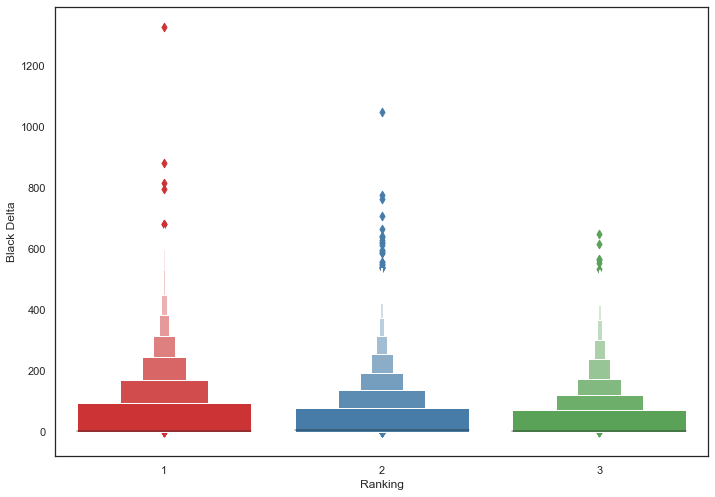

In [83]:
sortted_b["whiteElo"] = sortted_b["whiteElo"].astype(int)
sortted_b["blackElo"] = sortted_b["blackElo"].astype(int)
sortted_b['averageElo'] = sortted_b[["whiteElo", "blackElo"]].mean(axis=1)
y = sortted_b['averageElo']
min_thresh = y.mean()-1*y.std()
max_thresh = y.mean()+1*y.std()
conditions = [
    (sortted_b['averageElo'] < min_thresh),
    (sortted_b['averageElo'] > min_thresh) & (sortted_b['averageElo'] < max_thresh),
    (sortted_b['averageElo'] > max_thresh)]
choices = ['1', '2', '3']
ranking = np.select(conditions, choices, default='1')
sortted_b["ranking"] = ranking
sns.boxenplot(y=sortted_b["BlackDelta"], x=sortted_b["ranking"], palette="Set1");
plt.xlabel("Ranking")
plt.ylabel("Black Delta");

Text(0, 0.5, 'Total Moves')

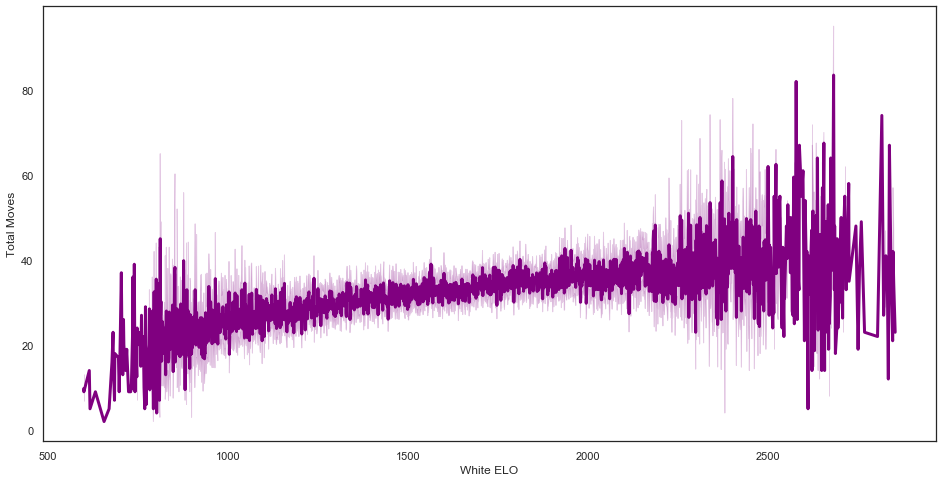

In [112]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(
    x="whiteElo", y="total_moves", lw=3, color='purple',
    data=sortted_b
);
plt.xlabel("White ELO")
plt.ylabel("Total Moves")
# plt.title("White ELO vs Move Score Avg");

# fig, ax = plt.subplots(figsize=(12, 6))
# sortted_b[["total_moves","total_checks"]].plot(ax=ax);

Text(0, 0.5, 'First Check At')

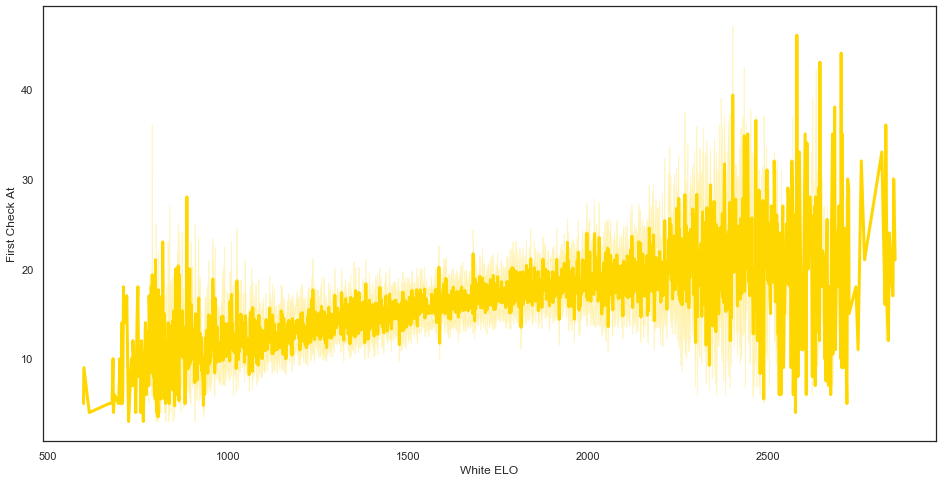

In [110]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(
    x="whiteElo", y="first_check_at", lw=3, color='gold',
    data=sortted_b
);
plt.xlabel("White ELO")
plt.ylabel("First Check At");

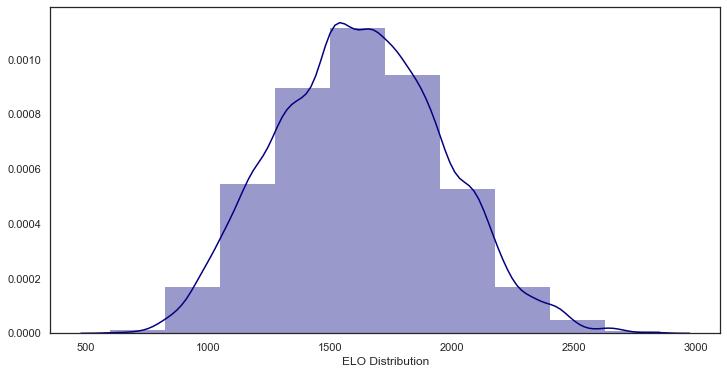

In [139]:
plt.rcParams["patch.force_edgecolor"] = False
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(
    sortted_b['whiteElo'], bins=10, color='#030080'
);
plt.xlabel("ELO Distribution");

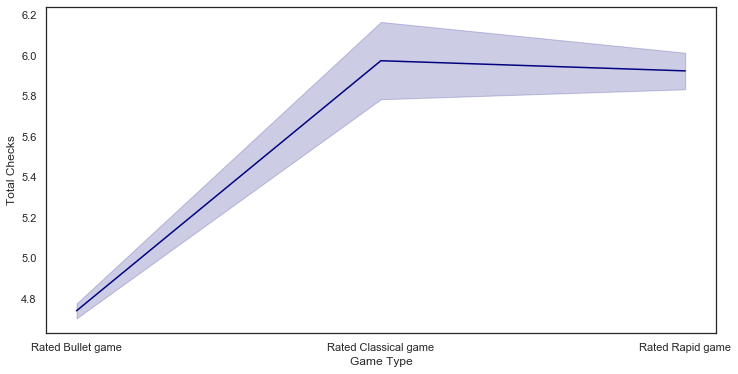

In [157]:
plt.rcParams["patch.force_edgecolor"] = False
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    data=sortted_b, x='event', y='total_checks', color='navy'
);
plt.xlabel("Game Type");
plt.ylabel("Total Checks");

AttributeError: 'list' object has no attribute 'get'

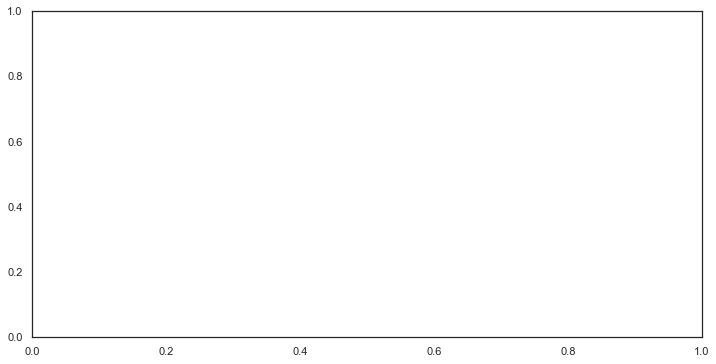

In [406]:
plt.rcParams["patch.force_edgecolor"] = False
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    data=all_data, x='event', y='total_checks', color='navy'
);
plt.xlabel("Game Type");
plt.ylabel("Total Checks");

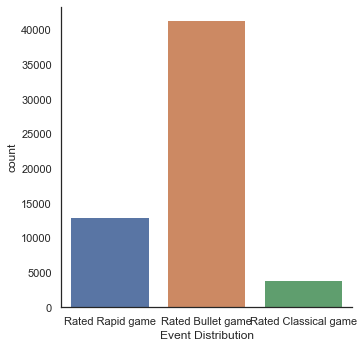

In [168]:
# plt.rcParams["patch.force_edgecolor"] = False
# fig, ax = plt.subplots(figsize=(12, 6))
sns.catplot(
    data=sortted_b, x='event', kind='count'
);
plt.xlabel("Event Distribution");

In [182]:
event_dist = sortted_b['event'].value_counts().to_frame().reset_index()
event_dist

,index,event
0,Rated Bullet game,41257
1,Rated Rapid game,12842
2,Rated Classical game,3790


In [426]:
sortted_b['RatingDiff'] = sortted_b['whiteRatingDiff'].astype('float') - sortted_b['blackRatingDiff'].astype('float')
# y="whiteRatingDiff", hue="blackRatingDiff" 

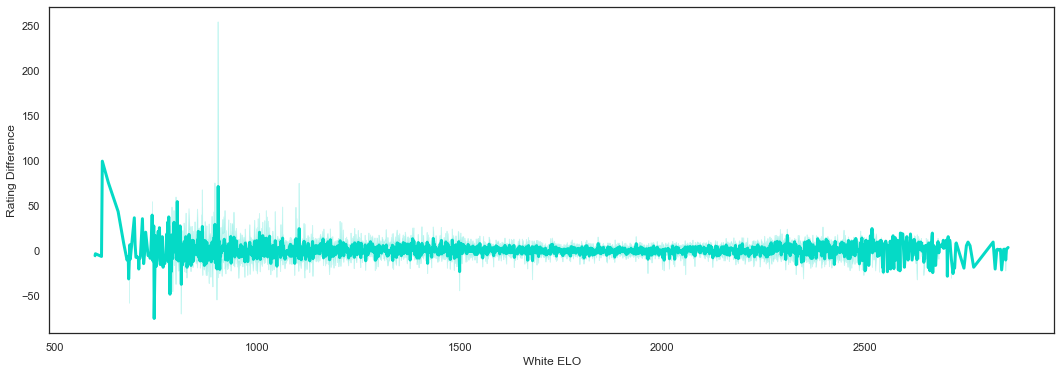

In [432]:
# sortted_b[['whiteRatingDiff', 'blackRatingDiff']]
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(
    x="whiteElo", y="RatingDiff", lw=3, color='#05dac6',
    data=sortted_b
);
plt.xlabel("White ELO")
plt.ylabel("Rating Difference");

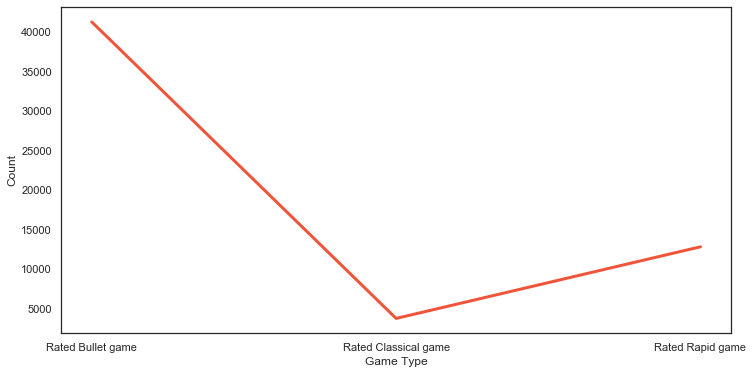

In [190]:
# plt.rcParams["patch.force_edgecolor"] = False
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(
    data=event_dist, x='index', y='event', color='#ef553a', lw=3
);
plt.xlabel("Game Type");
plt.ylabel("Count");

In [95]:
sortted_b.head()

,_id,event,site,white,black,result,uTCDate,uTCTime,whiteElo,blackElo,...,insufficient_material,can_claim_draw,black_king_castle,white_queen_castle,white_king_castle,black_queen_castle,WhiteDelta,BlackDelta,averageElo,ranking
68706,5ddc5f4e9163f69d8c46f15b,Rated Rapid game,https://lichess.org/Arz5gH0Q,DarkDrakonius,jmarcosq,0-1,2019.10.01,01:57:52,1542,1486,...,NaN,NaN,NaN,NaN,NaN,NaN,7.156250,0.0,1514.0,2
6239,5dcc5c09a8bab2469c909236,Rated Rapid game,https://lichess.org/EUu7QaNu,crazychess2000,Abdo6010,0-1,2019.10.01,00:09:53,1691,1491,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,1591.0,2
1954,5dcb7ba7210611e4d4850c17,Rated Bullet game,https://lichess.org/h5OBUWQz,Mosfischer,mustard123,1-0,2019.10.01,00:02:54,1512,1561,...,NaN,NaN,NaN,NaN,NaN,NaN,0.033898,0.0,1536.5,2
121966,5de748969163f69d8c47c167,Rated Rapid game,https://lichess.org/cY28g5Xh,AirTrafficMike,Tmgmaster,1-0,2019.10.01,03:38:29,2075,2075,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,2075.0,3
67415,5ddc1c0d9163f69d8c46ec50,Rated Bullet game,https://lichess.org/k2YPFjPz,AlbanGomez2,delamio,0-1,2019.10.01,01:55:21,1417,1422,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,1419.5,2


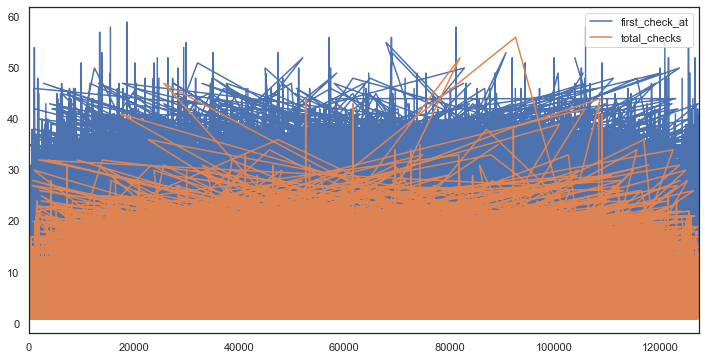

In [89]:
fig, ax = plt.subplots(figsize=(12, 6))
sortted_b[["first_check_at","total_checks"]].plot(ax=ax);

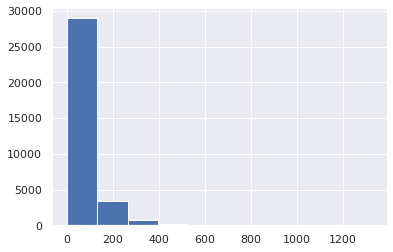

In [0]:
sortted_b["BlackDelta"].hist()